# COM Prophet Forecasting Test
Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

https://github.com/facebook/prophet

Docs: https://facebook.github.io/prophet/docs/quick_start.html

Prophet decomposes time series data into trend, seasonality and holiday effect.
* Trend models non periodic changes in the time series data.
* Seasonality is caused due to the periodic changes like daily, weekly, or yearly seasonality.
* Holiday effect which occur on irregular schedules over a day or a period of days.

In [1]:
#!pip install prophet

In [2]:
import numpy as np
import pandas as pd

In [3]:
from prophet import Prophet

In [21]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
# para calcular el fin de mes de una serie de datos:
from pandas.tseries.offsets import MonthEnd

In [4]:
# Sólo para cuando se ejecuta desde notebooks:
import warnings
warnings.filterwarnings("ignore", category=Warning)
# Seteos de Pandas para ver mejor la info. https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
# In max_columns and max_rows ‘None’ value means unlimited.
pd.set_option('display.max_rows', 100)
# Conviene setear min_rows también porque cuando se superan las max_rows, sólo muestra la cantidad indicada en min_rows.
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100
pd.options.display.float_format = '{:.1f}'.format

## Data Load
We previously downloaded data from https://cammesaweb.cammesa.com/informe-sintesis-mensual/, "Descargar Informes Históricos"
* BASE_INFORME_MENSUAL_2015-12.xlsx
* BASE_INFORME_MENSUAL_2018-12.xlsx
* BASE_INFORME_MENSUAL_2019-12.xlsx
* BASE_INFORME_MENSUAL_2022-05.xlsx

In [5]:
data_path = r'C:\Users\Usuario\OneDrive\0-Data Science\data_science\pampa\comercial\COM_relevamiento'
data_path = r'C:\Users\colmo\OneDrive\0-Data Science\data_science\pampa\comercial\COM_relevamiento'

In [6]:
df_2012_2014 = pd.read_excel(os.path.join(data_path, 'BASE_INFORME_MENSUAL_2015-12.xlsx'), sheet_name='DEMANDA'
                , header=21, usecols='A:L', decimal=',')
df_2012_2014 = df_2012_2014[df_2012_2014.MES<='2014-12-01']
print(df_2012_2014.shape)
print(df_2012_2014.dtypes)
df_2012_2014.head(3)

(40956, 12)
AÑO                            int64
MES                   datetime64[ns]
AGENTE NEMO                   object
AGENTE DESCRIPCION            object
TIPO AGENTE                   object
REGION                        object
PROVINCIA                     object
CATEGORIA AREA                object
CATEGORIA DEMANDA             object
TARIFA                        object
CATEGORIA TARIFA              object
DEMANDA [MWh]                float64
dtype: object


,AÑO,MES,AGENTE NEMO,AGENTE DESCRIPCION,TIPO AGENTE,REGION,PROVINCIA,CATEGORIA AREA,CATEGORIA DEMANDA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
0,2012,2012-01-01,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2222.6
1,2012,2012-01-01,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,536.9
2,2012,2012-01-01,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,336.3


In [8]:
df_2015_2017 = pd.read_excel(os.path.join(data_path, 'BASE_INFORME_MENSUAL_2018-12.xlsx'), sheet_name='DEMANDA'
                , header=21, usecols='A:L', decimal=',')
df_2015_2017 = df_2015_2017[df_2015_2017.MES<='2017-12-01']
print(df_2015_2017.shape)
print(df_2015_2017.dtypes)
df_2015_2017.head(3)

(41473, 12)
AÑO                            int64
MES                   datetime64[ns]
AGENTE NEMO                   object
AGENTE DESCRIPCION            object
TIPO AGENTE                   object
REGION                        object
PROVINCIA                     object
CATEGORIA AREA                object
CATEGORIA DEMANDA             object
TARIFA                        object
CATEGORIA TARIFA              object
DEMANDA [MWh]                float64
dtype: object


,AÑO,MES,AGENTE NEMO,AGENTE DESCRIPCION,TIPO AGENTE,REGION,PROVINCIA,CATEGORIA AREA,CATEGORIA DEMANDA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
0,2015,2015-01-01,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2098.8
1,2015,2015-01-01,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1665.9
2,2015,2015-01-01,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,348.7


In [12]:
df_2018 = pd.read_excel(os.path.join(data_path, 'BASE_INFORME_MENSUAL_2019-12.xlsx'), sheet_name='DEMANDA'
                , header=21, usecols='A:L', decimal=',')
df_2018 = df_2018[(df_2018.MES>='2018-01-01') & (df_2018.MES<='2018-12-01')]
print(df_2018.shape)
print(df_2018.dtypes)
df_2018.head(3)

(14304, 12)
AÑO                            int64
MES                   datetime64[ns]
AGENTE NEMO                   object
AGENTE DESCRIPCION            object
TIPO AGENTE                   object
REGION                        object
PROVINCIA                     object
CATEGORIA AREA                object
CATEGORIA DEMANDA             object
TARIFA                        object
CATEGORIA TARIFA              object
DEMANDA [MWh]                float64
dtype: object


,AÑO,MES,AGENTE NEMO,AGENTE DESCRIPCION,TIPO AGENTE,REGION,PROVINCIA,CATEGORIA AREA,CATEGORIA DEMANDA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
27598,2018,2018-01-01,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2038.3
27599,2018,2018-01-01,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1581.4
27600,2018,2018-01-01,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,343.5


In [10]:
path = r'C:\Users\Usuario\OneDrive\0-Data Science\data_science\pampa\comercial\COM_relevamiento\BASE_INFORME_MENSUAL_2022-05\Bases_Demanda_INFORME_MENSUAL'
path = r'C:\Users\colmo\OneDrive\0-Data Science\data_science\pampa\comercial\COM_relevamiento\BASE_INFORME_MENSUAL_2022-05\Bases_Demanda_INFORME_MENSUAL'
df_2019_2022 = pd.read_excel(os.path.join(path, 'Demanda Mensual.xlsx'), sheet_name='DEMANDA'
                , header=23, usecols='A:L', decimal=',')
#df_2019_2022 = df_2019_2022[(df_2019_2022.MES>='2018-01-01') & (df_2019_2022.MES<='2018-12-01')]
print(df_2019_2022.shape)
print(df_2019_2022.dtypes)
df_2019_2022.head(3)

(32619, 12)
AÑO                            int64
MES                   datetime64[ns]
AGENTE NEMO                   object
AGENTE DESCRIPCION            object
TIPO AGENTE                   object
REGION                        object
PROVINCIA                     object
CATEGORIA AREA                object
CATEGORIA DEMANDA             object
TARIFA                        object
CATEGORIA TARIFA              object
DEMANDA [MWh]                float64
dtype: object


,AÑO,MES,AGENTE NEMO,AGENTE DESCRIPCION,TIPO AGENTE,REGION,PROVINCIA,CATEGORIA AREA,CATEGORIA DEMANDA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
0,2019,2019-01-01,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1847.7
1,2019,2019-01-01,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1394.7
2,2019,2019-01-01,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,489.3


In [14]:
df_hist_detail = pd.concat([df_2012_2014, df_2015_2017, df_2018, df_2019_2022], ignore_index=True)
print(df_hist_detail.shape)
print(df_hist_detail.dtypes)
df_hist_detail.head(3)

(129352, 12)
AÑO                            int64
MES                   datetime64[ns]
AGENTE NEMO                   object
AGENTE DESCRIPCION            object
TIPO AGENTE                   object
REGION                        object
PROVINCIA                     object
CATEGORIA AREA                object
CATEGORIA DEMANDA             object
TARIFA                        object
CATEGORIA TARIFA              object
DEMANDA [MWh]                float64
dtype: object


,AÑO,MES,AGENTE NEMO,AGENTE DESCRIPCION,TIPO AGENTE,REGION,PROVINCIA,CATEGORIA AREA,CATEGORIA DEMANDA,TARIFA,CATEGORIA TARIFA,DEMANDA [MWh]
0,2012,2012-01-01,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2222.6
1,2012,2012-01-01,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,536.9
2,2012,2012-01-01,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,336.3


In [15]:
df_hist_detail.rename(columns={'AÑO': 'year', 'MES': 'month', 'AGENTE MEMO': 'agent_id', 'AGENTE DESCRIPCION': 'agent_desc'
                        , 'TIPO AGENTE': 'agent_type', 'REGION': 'region', 'PROVINCIA': 'province',	'CATEGORIA AREA': 'area_categ'
                        , 'CATEGORIA DEMANDA': 'demand_categ', 'TARIFA': 'rate', 'CATEGORIA TARIFA': 'rate_categ'
                        , 'DEMANDA [MWh]': 'demand_mwh'}, inplace=True)

In [16]:
df_hist = df_hist_detail.groupby('month').agg(monthly_demand_mwh=('demand_mwh', 'sum')).reset_index()
df_hist['monthly_demand_gwh'] = df_hist.monthly_demand_mwh / 1000

In [17]:
df_hist.head()

,month,monthly_demand_mwh,monthly_demand_gwh
0,2012-01-01,10804699.8,10804.7
1,2012-02-01,10085552.2,10085.6
2,2012-03-01,10175365.0,10175.4
3,2012-04-01,8969068.4,8969.1
4,2012-05-01,9597272.0,9597.3


In [86]:
# The input to Prophet is always a dataframe with two columns: ds and y. 
# The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.
# The y column must be numeric, and represents the measurement we wish to forecast.
# Therefore, we exclude the montlhy_demand_mwh column.
df_hist_univar = df_hist[['month', 'monthly_demand_gwh']].copy().rename(columns={'month': 'ds', 'monthly_demand_gwh': 'y'})
df_hist_univar.head()

,ds,y
0,2012-01-01,10804.7
1,2012-02-01,10085.6
2,2012-03-01,10175.4
3,2012-04-01,8969.1
4,2012-05-01,9597.3


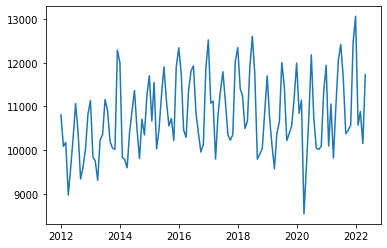

In [87]:
# You can see some trends in the dataset over time.
# You can also see periodicity.
plt.plot(df_hist_univar.ds, df_hist_univar.y)
plt.show()

In [88]:
# We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. 
# Then you call its fit method and pass in the historical dataframe.
model = Prophet()
model.fit(df_hist_univar)

13:51:08 - cmdstanpy - INFO - Chain [1] start processing
13:51:09 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
# Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 
# You can get a suitable dataframe that extends into the future a specified number of days using 
# the helper method Prophet.make_future_dataframe. 
# By default it will also include the dates from the history, so we will see the model fit as well.
future = model.make_future_dataframe(periods=12, freq='MS')
future.tail()

,ds
132,2023-01-01
133,2023-02-01
134,2023-03-01
135,2023-04-01
136,2023-05-01


In [90]:
# The predict method will assign each row in future a predicted value which it names yhat. 
# If you pass in historical dates, it will provide an in-sample fit. 
# The forecast object here is a new dataframe that includes a column yhat with the forecast, 
# as well as columns for components and uncertainty intervals.
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
132,2023-01-01,12524.8,12017.3,12998.2
133,2023-02-01,11343.0,10877.7,11833.4
134,2023-03-01,11165.8,10666.9,11621.9
135,2023-04-01,10459.3,10023.9,10964.5
136,2023-05-01,11187.5,10693.4,11680.8


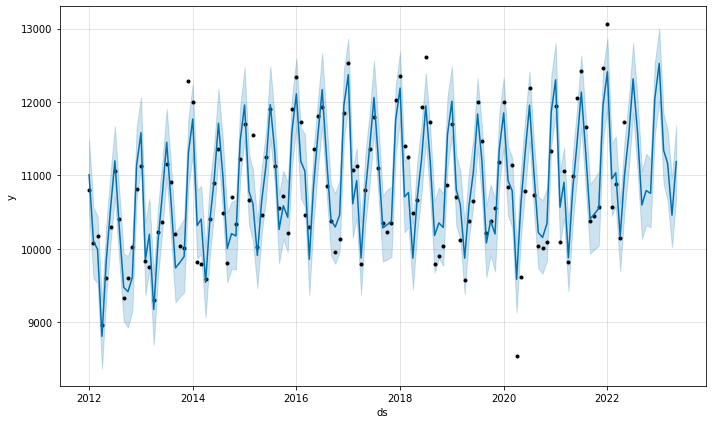

In [91]:
# You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.
fig1 = model.plot(forecast)

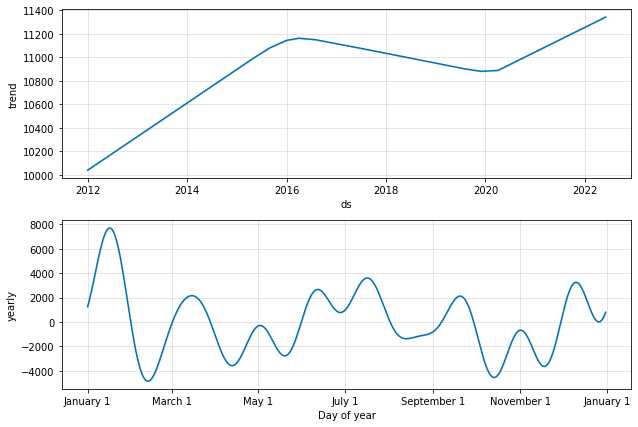

In [35]:
# If you want to see the forecast components, you can use the Prophet.plot_components method. 
# By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 
# If you include holidays, you’ll see those here, too.
fig2 = model.plot_components(forecast)

In [92]:

plot_plotly(model, forecast)

In [40]:
plot_components_plotly(model, forecast)

In [50]:
print(df_hist_univar.ds.max())

2022-05-01 00:00:00


12:43:33 - cmdstanpy - INFO - Chain [1] start processing
12:43:33 - cmdstanpy - INFO - Chain [1] done processing


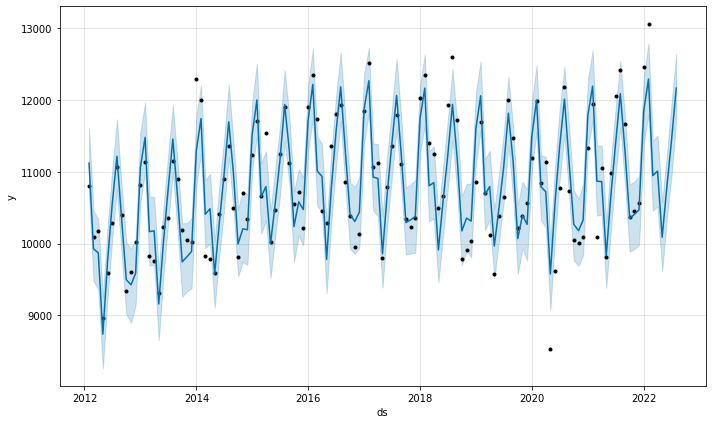

In [65]:
# Validación entrenando el modelo con menos datos.
test_date = '2022-01-01'
df_ = df_hist_univar[df_hist_univar.ds <= test_date].copy()
# El dataset original presenta las fechas al inicio del mes. Prophet.make_future_dataframe calcula las fechas a fin del mes... no sé si
# esto puede traer una inconsistencia. Lo intento resolver:
df_.ds = pd.to_datetime(df_.ds, format="%Y%m") + MonthEnd(1)
model = Prophet()
model.fit(df_)
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)
fig1 = model.plot(forecast)

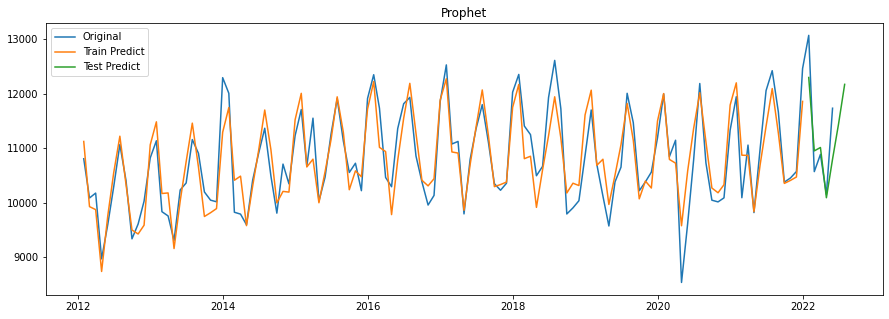

In [67]:
plt.figure(figsize=(15, 5))
df_all = df_hist_univar.copy()
df_all.ds = pd.to_datetime(df_all.ds, format="%Y%m") + MonthEnd(1)
plt.plot(df_all.ds, df_all.y, label='Original')
trainPredictPlot = forecast[forecast.ds<=test_date]
plt.plot(trainPredictPlot.ds, trainPredictPlot.yhat, label='Train Predict')
testPredictPlot = forecast[forecast.ds>test_date]
plt.plot(testPredictPlot.ds, testPredictPlot.yhat, label='Test Predict')
plt.title('Prophet')
plt.legend()
plt.show()

In [85]:
df_hist_univar[df_hist_univar.ds>='2022-01-01']
df_compara = forecast.merge(df_all, how='left')
df_compara['error'] = df_compara.y - df_compara.yhat
df_compara['percent_error'] = df_compara.error / df_compara.y * 100
df_compara[['ds', 'y', 'yhat', 'error', 'percent_error']].tail(15)

,ds,y,yhat,error,percent_error
112,2021-05-31,10986.1,10691.2,294.9,2.7
113,2021-06-30,12053.8,11398.7,655.1,5.4
114,2021-07-31,12419.0,12090.9,328.0,2.6
115,2021-08-31,11660.9,11272.1,388.8,3.3
116,2021-09-30,10375.9,10352.5,23.4,0.2
117,2021-10-31,10452.3,10407.8,44.4,0.4
118,2021-11-30,10570.6,10470.3,100.3,0.9
119,2021-12-31,12458.3,11855.9,602.4,4.8
120,2022-01-31,13066.6,12294.1,772.4,5.9
121,2022-02-28,10568.6,10948.8,-380.2,-3.6


In [79]:
plot_plotly(model, forecast)

In [75]:
# Plotly figure 1
fig = px.line(df_compara, x='ds', y=['y', 'yhat'])
fig.update_layout(title='Prophet' , showlegend=True)
fig.show()

In [ ]:
https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet/notebook